In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame(pd.read_pickle("../liquidity_provider_data/plsx_wpls.pkl"))

In [2]:
data.head()

contract_address event_name  \
0  0x1b45b9148791d3a104184Cd5DFE5CE57193a3ee9       Sync   
1  0x1b45b9148791d3a104184Cd5DFE5CE57193a3ee9       Swap   
2  0x1b45b9148791d3a104184Cd5DFE5CE57193a3ee9       Sync   
3  0x1b45b9148791d3a104184Cd5DFE5CE57193a3ee9       Swap   
4  0x1b45b9148791d3a104184Cd5DFE5CE57193a3ee9       Sync   

                                              topics  \
0  [0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...   
1  [0xd78ad95fa46c994b6551d0da85fc275fe613ce37657...   
2  [0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...   
3  [0xd78ad95fa46c994b6551d0da85fc275fe613ce37657...   
4  [0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...   

                                                data  block_number  \
0  0x0000000000000000000000000000000000000000000a...      17240414   
1  0x00000000000000000000000000000000000000000001...      17240414   
2  0x00000000000000000000000000000000000000000009...      17240806   
3  0x00000000000000000000000000000000000000000000...      17240806   
4  0x00000000000000000000000000000000000000000008...      17240809   

                                    transaction_hash  transaction_index  \
0  0x0a2439e1a9a3d2a17dec2e4fba281c5f625f8e944605...                  0   
1  0x0a2439e1a9a3d2a17dec2e4fba281c5f625f8e944605...                  0   
2  0xca2f21e8eb438e7a4e22135efe281c5cecec72bf53e6...                  0   
3  0xca2f21e8eb438e7a4e22135efe281c5cecec72bf53e6...                  0   
4  0x0fc0f4a1e508c62cc3af07f28d38ebddf35a149c3b00...                  0   

                                          block_hash  log_index  \
0  0x2b75b682d70557316eef7437a5056ea7f8aae05a12f5...          5   
1  0x2b75b682d70557316eef7437a5056ea7f8aae05a12f5...          6   
2  0x07e58d12233d950dedce731438c3000b1552c23e897f...          5   
3  0x07e58d12233d950dedce731438c3000b1552c23e897f...          6   
4  0x3bfe606f29ddb803fc9428f61d5f29b6c9b3667d6219...          5   

                     transaction_from_address  \
0  0x7217A282Ec8E72ADbd96EE7C8B215e9C3FDcbf47   
1  0x7217A282Ec8E72ADbd96EE7C8B215e9C3FDcbf47   
2  0x7217A282Ec8E72ADbd96EE7C8B215e9C3FDcbf47   
3  0x7217A282Ec8E72ADbd96EE7C8B215e9C3FDcbf47   
4  0x7217A282Ec8E72ADbd96EE7C8B215e9C3FDcbf47   

                       transaction_to_address transaction_gas  \
0  0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02          613374   
1  0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02          613374   
2  0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02          580436   
3  0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02          580436   
4  0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02          580408   

  transaction_gas_price  
0            1500000007  
1            1500000007  
2            1500000007  
3            1500000007  
4            1500000007

<Axes: ylabel='event_name'>

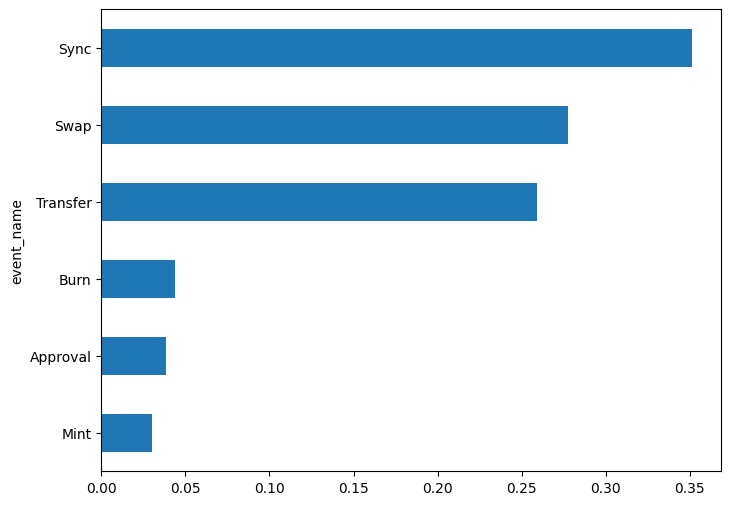

In [3]:
data.value_counts("event_name", normalize=True).sort_values().plot(kind='barh', figsize=(8, 6))

<Axes: xlabel='block_number'>

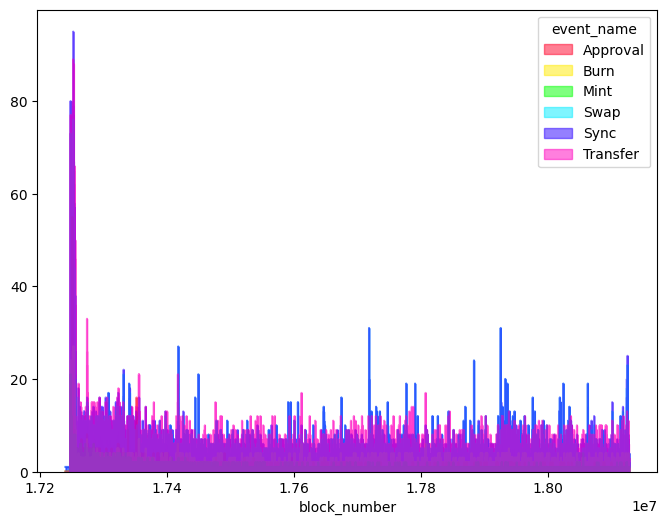

In [4]:
areaplot = data.groupby(['block_number','event_name']).transaction_hash.count().reset_index().pivot(index='block_number', columns='event_name', values='transaction_hash').fillna(0)
areaplot.plot.area(stacked=False, colormap="gist_rainbow",  figsize=(8, 6))

In [5]:
areaplot


event_name    Approval  Burn  Mint  Swap  Sync  Transfer
block_number                                            
17240414           0.0   0.0   0.0   1.0   1.0       0.0
17240806           0.0   0.0   0.0   1.0   1.0       0.0
17240809           0.0   0.0   0.0   1.0   1.0       0.0
17248151           0.0   0.0   0.0   1.0   1.0       0.0
17248153           0.0   0.0   0.0   1.0   1.0       0.0
...                ...   ...   ...   ...   ...       ...
18128605           0.0   0.0   0.0   1.0   1.0       0.0
18128608           0.0   0.0   0.0   1.0   1.0       0.0
18128611           0.0   0.0   0.0   2.0   2.0       0.0
18128612           0.0   0.0   0.0   2.0   2.0       0.0
18128616           0.0   0.0   0.0   1.0   1.0       0.0

[349007 rows x 6 columns]